# Understanding NumPy Arrays

In [17]:
import numpy as np
import matplotlib.pyplot as plt
tree_census = np.load('data/tree_census.npy')
sudoku_game = np.load('data/sudoku_game.npy')

In [2]:
# Create an array of zeros which has four columns and two rows
zero_array = np.zeros((2,4))
print(zero_array)

# Create an array of random floats which has six columns and three rows
random_array = np.random.random((3,6))
print(random_array)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.65490804 0.56729534 0.94782225 0.55566918 0.45402745 0.05756125]
 [0.57211457 0.97057288 0.76144568 0.91623428 0.99167914 0.91406297]
 [0.99914304 0.01839933 0.06441651 0.06452257 0.42754199 0.54786102]]


In [3]:
# Flatten sudoku_game
flattened_game = sudoku_game.flatten()

# Print the shape of flattened_game
print(flattened_game.shape)

# Reshape flattened_game back to a nine by nine array
reshaped_game = flattened_game.reshape(9,-1)

# Print sudoku_game and reshaped_game
print(sudoku_game)
print(reshaped_game)

(72,)
[[0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]
[[0 0 5 0 0 9 0 0]
 [1 0 7 0 0 6 0 0]
 [4 3 0 0 6 0 0 2]
 [0 8 7 1 9 0 0 0]
 [7 4 0 0 0 5 0 0]
 [8 3 0 0 0 6 0 0]
 [0 0 0 1 0 5 0 0]
 [3 5 0 8 6 9 0 0]
 [4 2 9 1 0 3 0 0]]


In [4]:
# Create an array of zeros with three rows and two columns
zero_array = np.zeros((3, 2))

# Print the data type of zero_array
print(zero_array.dtype)

# Create a new array of int32 zeros with three rows and two columns
zero_int_array = np.zeros((3,2), dtype = np.int32)

# Print the data type of zero_int_array
print(zero_int_array.dtype)

float64
int32


In [34]:
# Print the data type of sudoku_game
print(sudoku_game.dtype)

# Change the data type of sudoku_game to int8
small_sudoku_game = sudoku_game.astype(np.int8)

# Print the data type of small_sudoku_game
print(small_sudoku_game.dtype)

int64
int8


In [5]:
# Select all rows of block ID data from the second column
block_ids = tree_census[:, 1]

# Select five block IDs from block_ids starting with the tenth ID
block_id_slice = block_ids[9:14]
print(block_id_slice)

[501911 501911 501911 501909 501909]


In [6]:
# Create an array of trunk diameters with even row indices from 50 to 100 inclusive
every_other_diameter = np.array(tree_census[50:101:2,2])
print(every_other_diameter)

sorted_trunk_diameters = np.sort(every_other_diameter)
print(sorted_trunk_diameters)

[ 5  5 51  4  3  6  3  3  3  6  5  5  4  7  6  4  5  5  3  3  6  8  4  4
  4  6]
[ 3  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  7
  8 51]


In [7]:
# Create an array which contains row data on the largest tree in tree_census
largest_tree_data = tree_census[tree_census[:, 2] == 51]
print(largest_tree_data)

# Slice largest_tree_data to get only the block ID
largest_tree_block_id = largest_tree_data[:, 1]
print(largest_tree_block_id)

# Create an array which contains row data on all trees with largest_tree_block_id
trees_on_largest_tree_block = tree_census[tree_census[:,1] == largest_tree_block_id]
print(trees_on_largest_tree_block)

[[    61 501882     51      0]]
[501882]
[[    60 501882      8      0]
 [    61 501882     51      0]
 [    62 501882      7      0]
 [    63 501882      4      0]
 [    64 501882     15      0]
 [    65 501882      3      0]
 [    66 501882      8      0]
 [    67 501882      6      0]
 [    68 501882      6      0]
 [    69 501882      3      0]]


In [8]:
# Create an array of row_indices for trees on block 313879
row_indices = np.where(tree_census[:,1] == 313879)

# Create an array which only contains data for trees on block 313879
block_313879 = tree_census[row_indices]
print(block_313879)

[[  1115 313879      3      0]
 [  1116 313879     17      0]]


# Selecting and Updating Data

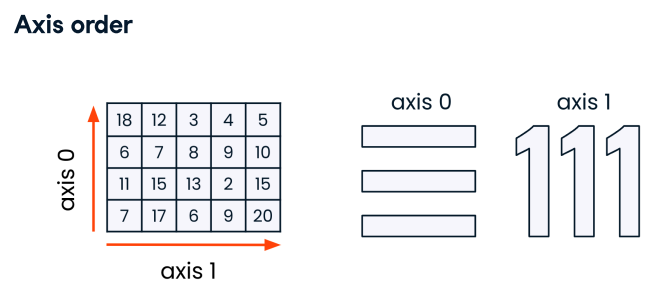

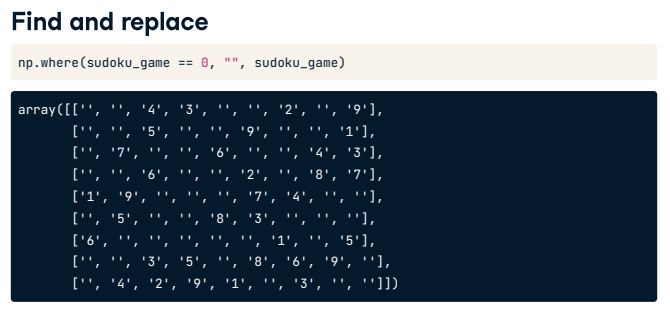

In [9]:
# Create and print a 1D array of tree and stump diameters
trunk_stump_diameters = np.where(tree_census[:,2] == 0, tree_census[:,3], tree_census[:,2])
print(trunk_stump_diameters)

[24 20  3  3  4  4  4  4  4  3  3  4  2  2  3  4  4  4  3 14  3  4  7  8
  7  8  7  5  6  5  5 17 31 19 21 18  4  5  3  4  3  4 13 13 13  5  4  4
  4 11  5  4  5  8 51  7  4 15  3  8  6  6  3  4  3  2  3  3  6  5  5  5
  5  9  4  4  7  7  6  5  4  4  5  5  5  7  3  5  3  3  6  6  8  7  4  5
  4  4  4  4  6  5  3  4 12 12 12  5  6  6  6  6  6  5  5  6  7  7 25  5
  5  4  6  6  7 11  6 17 13 14 14 20 15 13  7  7 10 17 14  4  6  7  8  7
  7  6  7  5  2  2  2  2 26 25  2 15  6 20  5  9 15 13 15  3  2 13  6 12
 15 18 22 18 18 15 17  7  3  7  8  4 12 11 12  3  9 12 11 10  8  6  6  7
  7  3 15 12 12  4  5  5  5  4  4  5  4  9  2  4  4  6  5  5  2  5  5  4
  4  5  5  6 11  4  5  7  3 14 11 10  7 15 10  5  6 10 10  6  5  4  4  3
  5  4 14 12 11  8 14 12  9 12 11  7  8 10 10 12 11 12  5  5  6  9  9  8
  5  5  5  6  6 12 12 11 12  8  9  5  5  5  8  2  2  2 14 18 14 14 22 15
 19 14 18  7  7  7  8  8  5 10 14  2  2  2  2 11 12 12  3  3  3  3  3  6
  6  8  2  2 11 11 11  9 11 12 13  9 11  6  4  5  5

In [10]:
new_trees = np.array([[1211, 227386, 20, 0], [1212, 227386, 8, 0]])

In [11]:
# Print the shapes of tree_census and new_trees
print(tree_census.shape, new_trees.shape)

# Add rows to tree_census which contain data for the new trees
updated_tree_census = np.concatenate((tree_census,new_trees), axis = 0)
print(updated_tree_census)

(1000, 4) (2, 4)
[[     3 501451     24      0]
 [     4 501451     20      0]
 [     7 501911      3      0]
 ...
 [  1210 227386      6      0]
 [  1211 227386     20      0]
 [  1212 227386      8      0]]


In [12]:
# Print the shapes of tree_census and trunk_stump_diameters
print(trunk_stump_diameters.shape, tree_census.shape)

# Reshape trunk_stump_diameters
reshaped_diameters = trunk_stump_diameters.reshape((1000, 1))

# Concatenate reshaped_diameters to tree_census as the last column
concatenated_tree_census = np.concatenate((tree_census,reshaped_diameters), axis = 1)
print(concatenated_tree_census)

(1000,) (1000, 4)
[[     3 501451     24      0     24]
 [     4 501451     20      0     20]
 [     7 501911      3      0      3]
 ...
 [  1198 227387     11      0     11]
 [  1199 227387     11      0     11]
 [  1210 227386      6      0      6]]


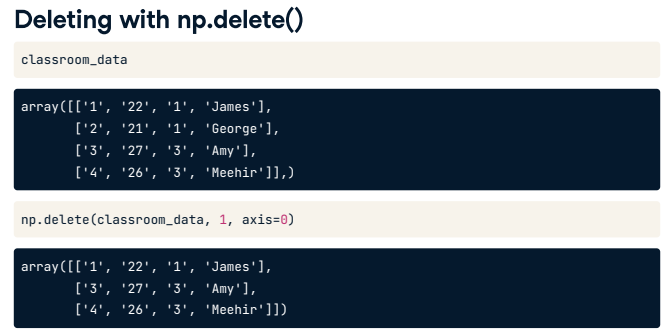

In [13]:
# Delete the stump diameter column from tree_census
tree_census_no_stumps = np.delete(tree_census, 3, axis=1)

# Save the indices of the trees on block 313879
private_block_indices = np.where(tree_census[:,1] == 313879)

# Delete the rows for trees on block 313879 from tree_census_no_stumps
tree_census_clean = np.delete(tree_census_no_stumps, private_block_indices, axis = 0)

# Print the shape of tree_census_clean
print(tree_census_clean.shape)

(998, 3)


# Array Mathematics!

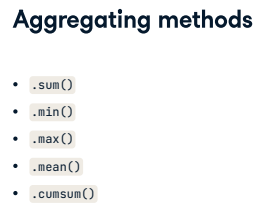

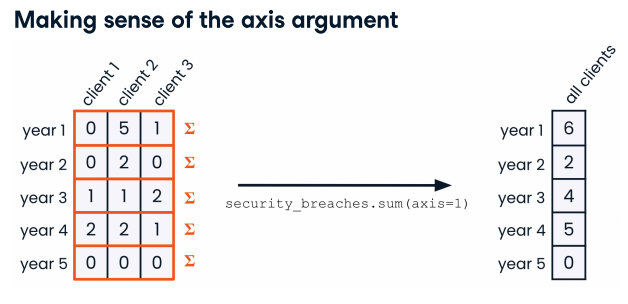

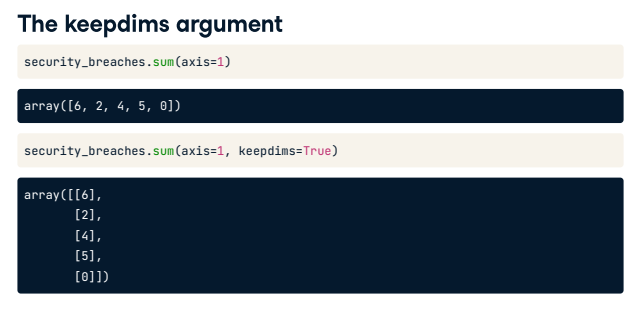

In [14]:
monthly_sales = np.load('data/monthly_sales.npy')

In [15]:
# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims=True)
print(monthly_industry_sales)

# Add this column as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales,monthly_industry_sales), axis = 1)
print(monthly_sales_with_total)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]
[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


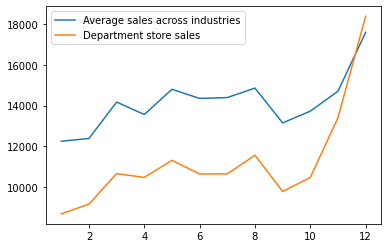

In [19]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis=1)
print(avg_monthly_sales)

# Plot avg_monthly_sales by month
plt.plot(np.arange(1,13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], monthly_sales[:,2], label="Department store sales")
plt.legend()
plt.show()

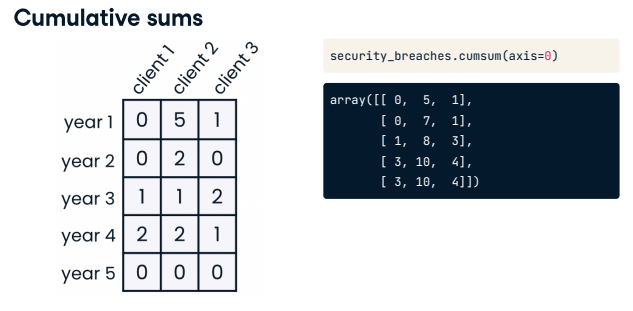

[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


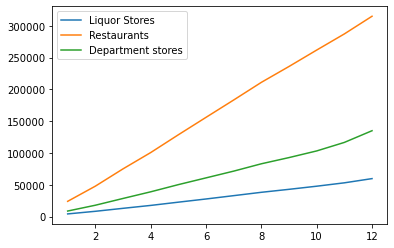

In [20]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
print(cumulative_monthly_industry_sales)

# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()

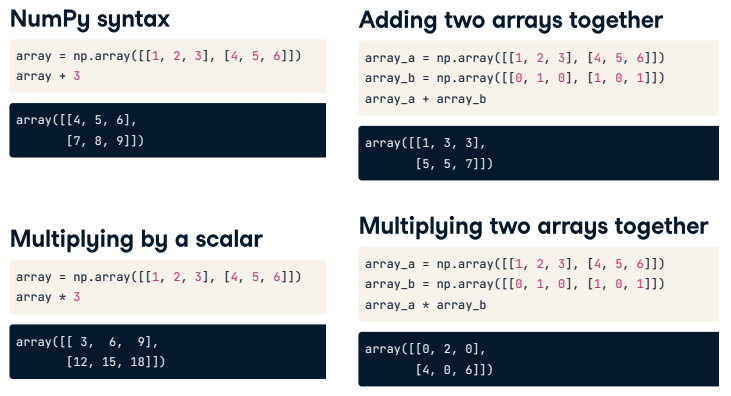

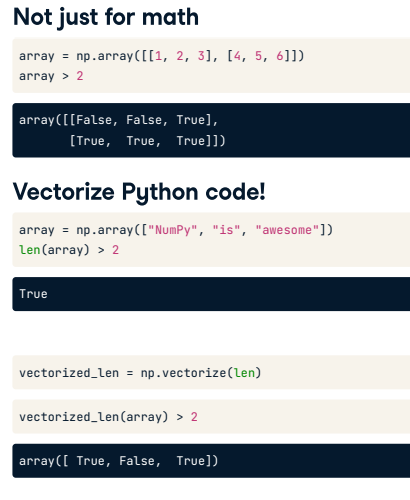

In [21]:
# Create an array of tax collected by industry and month
tax_collected = monthly_sales * 0.05
print(tax_collected)

# Create an array of sales revenue plus tax collected by industry and month
total_tax_and_revenue = monthly_sales + tax_collected
print(total_tax_and_revenue)

[[ 206.7  1196.25  432.85]
 [ 205.8  1193.75  457.1 ]
 [ 233.65 1359.85  532.25]
 [ 229.   1281.85  522.8 ]
 [ 255.45 1399.75  564.95]
 [ 250.55 1370.95  531.25]
 [ 262.25 1365.25  531.5 ]
 [ 263.5  1388.    577.5 ]
 [ 234.   1249.4   488.1 ]
 [ 245.65 1290.1   522.8 ]
 [ 265.6  1270.25  670.05]
 [ 331.5  1389.85  920.15]]
[[ 4340.7  25121.25  9089.85]
 [ 4321.8  25068.75  9599.1 ]
 [ 4906.65 28556.85 11177.25]
 [ 4809.   26918.85 10978.8 ]
 [ 5364.45 29394.75 11863.95]
 [ 5261.55 28789.95 11156.25]
 [ 5507.25 28670.25 11161.5 ]
 [ 5533.5  29148.   12127.5 ]
 [ 4914.   26237.4  10250.1 ]
 [ 5158.65 27092.1  10978.8 ]
 [ 5577.6  26675.25 14071.05]
 [ 6961.5  29186.85 19323.15]]


In [24]:
names = np.array([["Izzy", "Monica", "Marvin"],
                  ["Weber", "Patel", "Hernandez"]])

# Vectorize the .upper() string method
vectorized_upper = np.vectorize(str.upper)

# Apply vectorized_upper to the names array
uppercase_names = vectorized_upper(names)
print(uppercase_names)

[['IZZY' 'MONICA' 'MARVIN']
 ['WEBER' 'PATEL' 'HERNANDEZ']]


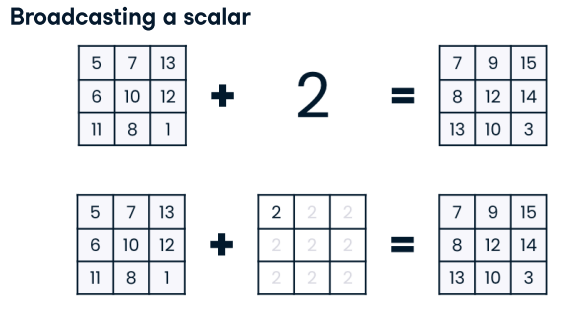

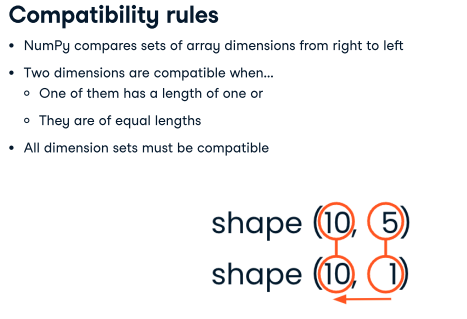

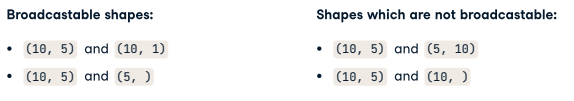

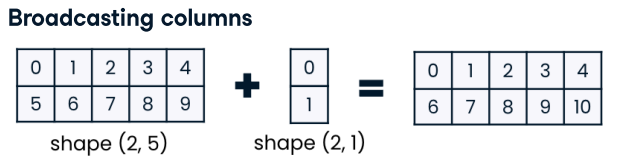

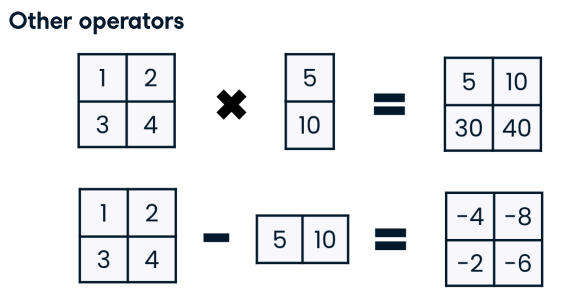

In [26]:
monthly_growth_rate = [1.01, 1.03, 1.03, 1.02, 1.05, 1.03, 1.06, 1.04, 1.03, 1.04, 1.02, 1.01]
# Convert monthly_growth_rate into a NumPy array
monthly_growth_1D = np.array(monthly_growth_rate)

# Reshape monthly_growth_1D
monthly_growth_2D = monthly_growth_1D.reshape(12,1)

# Multiply each column in monthly_sales by monthly_growth_2D
print(monthly_sales*monthly_growth_2D)

[[ 4175.34 24164.25  8743.57]
 [ 4239.48 24591.25  9416.26]
 [ 4813.19 28012.91 10964.35]
 [ 4671.6  26149.74 10665.12]
 [ 5364.45 29394.75 11863.95]
 [ 5161.33 28241.57 10943.75]
 [ 5559.7  28943.3  11267.8 ]
 [ 5480.8  28870.4  12012.  ]
 [ 4820.4  25737.64 10054.86]
 [ 5109.52 26834.08 10874.24]
 [ 5418.24 25913.1  13669.02]
 [ 6696.3  28074.97 18587.03]]


In [29]:
monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
       [1.00, 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])

In [30]:
# Find the mean sales projection multiplier for each industry
mean_multipliers = monthly_industry_multipliers.mean(axis=0)
print(mean_multipliers)

# Print the shapes of mean_multipliers and monthly_sales
print(mean_multipliers.shape, monthly_sales.shape)

# Multiply each value by the multiplier for that industry
projected_sales = monthly_sales * mean_multipliers
print(projected_sales)

[1.0775     1.00833333 0.99333333]
(3,) (12, 3)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]


# Array Transformations

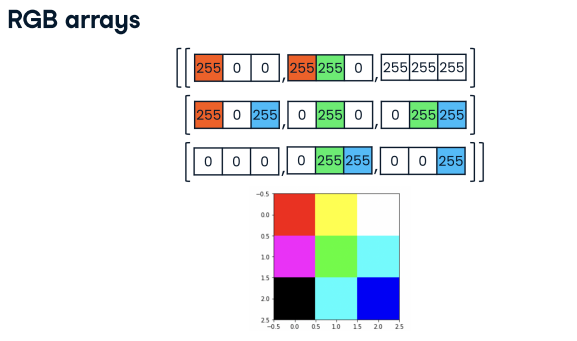

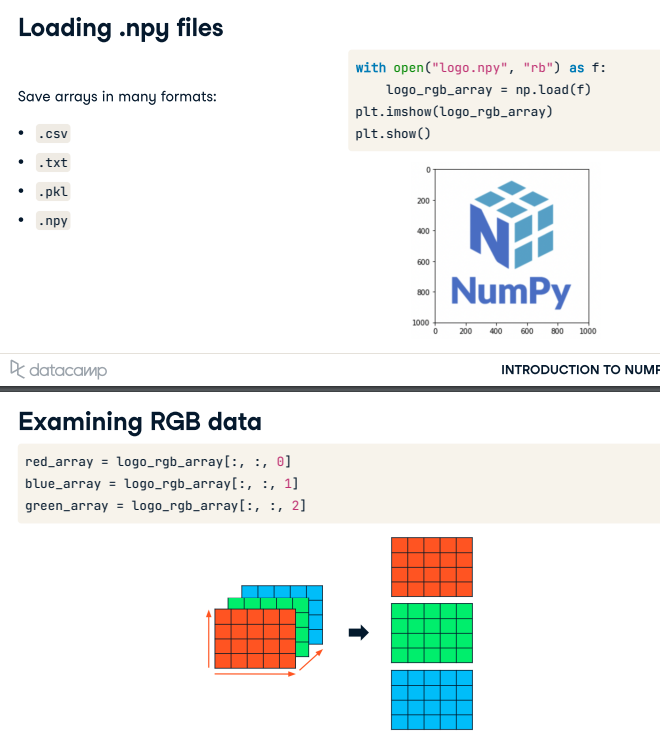

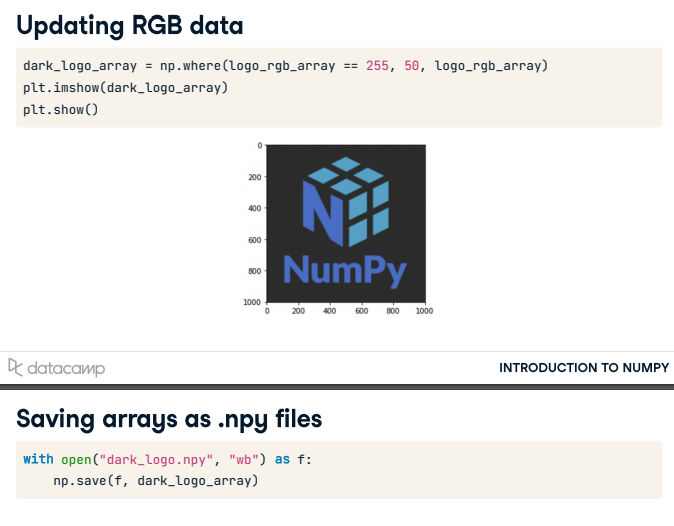

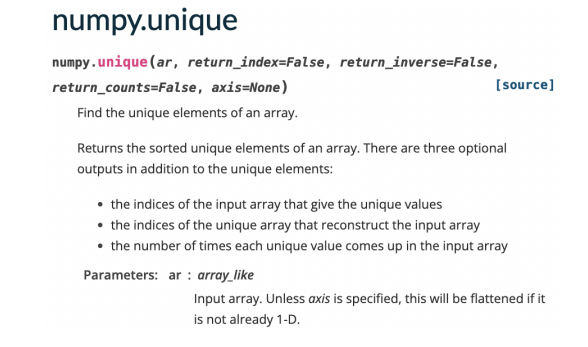

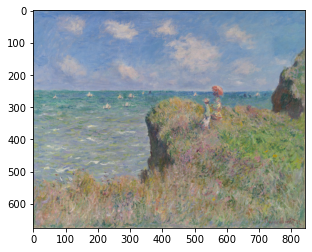

In [33]:
# Load the mystery_image.npy file 
with open('data/rgb_array.npy','rb') as f:
    rgb_array = np.load(f)

plt.imshow(rgb_array)
plt.show()

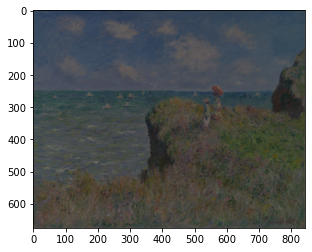

In [35]:
# Reduce every value in rgb_array by 50 percent
darker_rgb_array = rgb_array * 0.5

# Convert darker_rgb_array into an array of integers
darker_rgb_int_array = darker_rgb_array.astype(np.int8)
plt.imshow(darker_rgb_int_array)
plt.show()

# Save darker_rgb_int_array to an .npy file called darker_monet.npy
with open ('darker_monet.npy', 'wb') as f:
    np.save(f, darker_rgb_int_array)

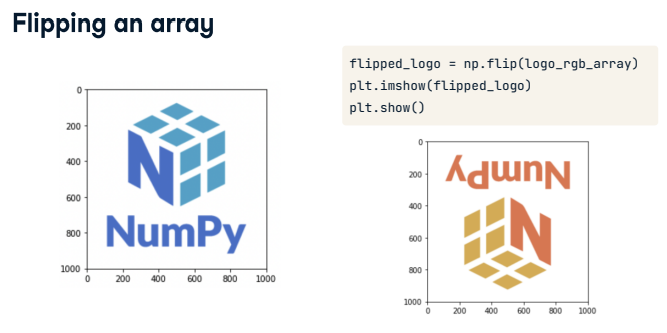

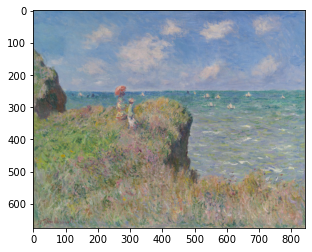

In [36]:
# Flip rgb_array so that it is the mirror image of the original
mirrored_monet = np.flip(rgb_array, axis = 1)
plt.imshow(mirrored_monet)
plt.show()

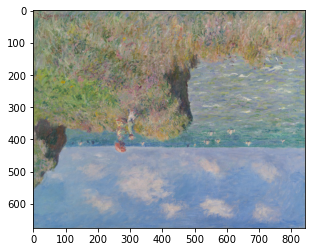

In [39]:
# Flip rgb_array so that it is upside down
upside_down_monet = np.flip(rgb_array, axis = (0,1))
plt.imshow(upside_down_monet)
plt.show()

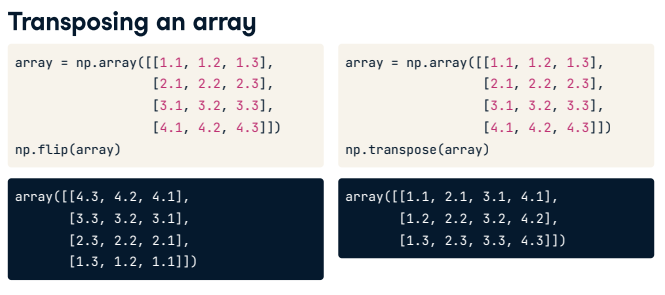

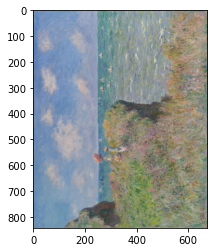

In [40]:
# Transpose rgb_array
transposed_rgb = np.transpose(rgb_array, axes = (1,0,2))
plt.imshow(transposed_rgb)
plt.show()

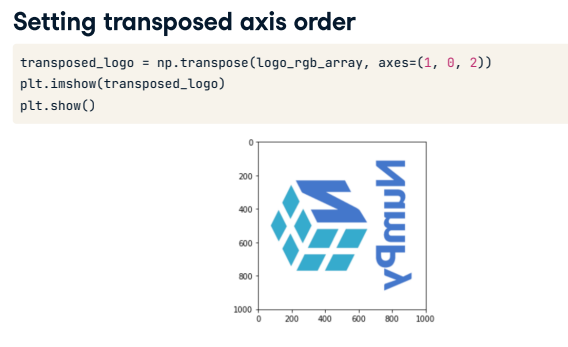

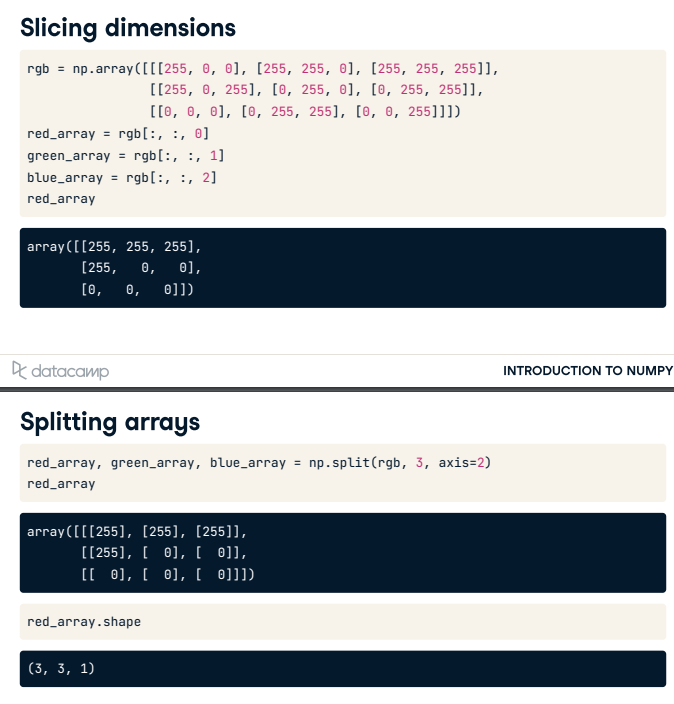

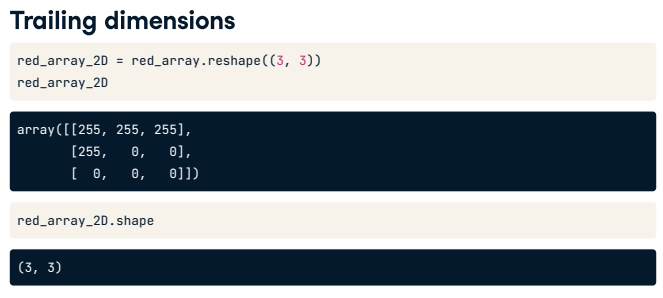

In [42]:
# Split monthly_sales into quarterly data
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales, 4)

# Print q1_sales
print(q1_sales)

# Stack the four quarterly sales arrays
quarterly_sales = np.stack([q1_sales, q2_sales, q3_sales, q4_sales], axis = 0)
print(quarterly_sales)
print(quarterly_sales.shape)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]
[[[ 4134 23925  8657]
  [ 4116 23875  9142]
  [ 4673 27197 10645]]

 [[ 4580 25637 10456]
  [ 5109 27995 11299]
  [ 5011 27419 10625]]

 [[ 5245 27305 10630]
  [ 5270 27760 11550]
  [ 4680 24988  9762]]

 [[ 4913 25802 10456]
  [ 5312 25405 13401]
  [ 6630 27797 18403]]]
(4, 3, 3)


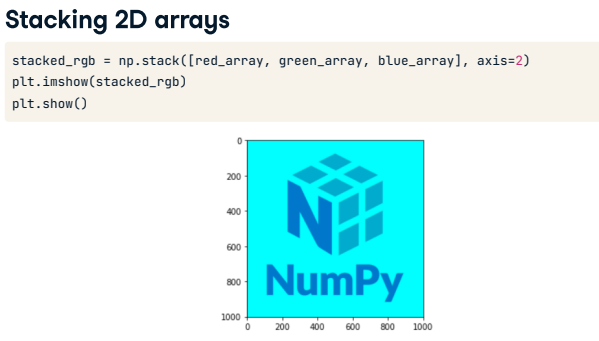

In [44]:
# Split rgb_array into red, green, and blue arrays
red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

# Create emphasized_blue_array
emphasized_blue_array = np.where(blue_array > blue_array.mean(), 255, blue_array)

# Print the shape of emphasized_blue_array
print(emphasized_blue_array.shape)

# Remove the trailing dimension from emphasized_blue_array
emphasized_blue_array_2D = emphasized_blue_array.reshape(675,843)

(675, 843, 1)


(675, 843, 1) (675, 843)


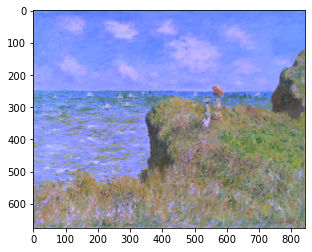

In [46]:
# Print the shapes of blue_array and emphasized_blue_array_2D
print(blue_array.shape, emphasized_blue_array_2D.shape)

# Reshape red_array and green_array
red_array_2D = red_array.reshape((675, 843))
green_array_2D = green_array.reshape((675, 843))

# Stack red_array_2D, green_array_2D, and emphasized_blue_array_2D
emphasized_blue_monet = np.stack([red_array_2D, green_array_2D, emphasized_blue_array_2D], axis = 2)
plt.imshow(emphasized_blue_monet)
plt.show()